In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table
import time
from pandas import DataFrame, read_csv
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
import copy

In [2]:
file = r'Gaia_plx7_dr2.csv'
df = pd.read_csv(file)
df2 = df.columns.get_values()
df2.tolist()
print('Succesfully Read in the Data')

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (96,122,130) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Succesfully Read in the Data


In [3]:
Gmag = df["phot_g_mean_mag"].values
GBmag = df["phot_bp_mean_mag"].values
GRmag = df["phot_rp_mean_mag"].values
# 2MASS bands
Jmag = df["j_m"].values
Hmag = df["h_m"].values
Kmag = df["ks_m"].values
J_unc = df['j_msigcom'].values
H_unc = df['h_msigcom'].values
K_unc = df['ks_msigcom'].values
# Other Important Data
plx = df["parallax"].values
Dist = 1000./plx
K_er = df["ks_msigcom"].values
J_er = df['j_msigcom'].values
H_er = df['h_msigcom'].values
G_flux = df["phot_g_mean_flux"].values
G_flux_er = df["phot_g_mean_flux_error"].values
GB_flux = df['phot_bp_mean_flux'].values
GB_flux_er = df['phot_bp_mean_flux_error'].values
GR_flux = df['phot_rp_mean_flux'].values
GR_flux_er = df['phot_rp_mean_flux_error'].values
SNR = G_flux/G_flux_er

In [4]:
def ColorClassification(Gmags,Kmags,colors):    
    #assign the stars into different categories based on G-K
    
    #Variables Read In
    #Gmags: numpy array of absolute magnitudes in G
    #Kmags: numpy array of absolute magnitudes in K
    #colors: list or array of values of G-K in increasing order
    
    #Variables Returned
    #color: numpy array that indicates the category of G-K that each star belongs to
    
    #caclculate the values of G-K for all stars
    
    G_K = Gmags-Kmags
    
    #create array to hold the G-K color categories 
    color = np.ones(len(G_K))*1000
    
    #compare the value of G-K for each star to the categories and assign a corresponding
    #value for the category in the color array
    for i in range(len(colors)):
        for j in range(len(G_K)):
            if (i == 0):
                if (G_K[j] <= colors[i]):
                    color[j] = colors[i]
            elif(G_K[j] <= colors[i] and G_K[j] > colors[i-1]):
                color[j] = colors[i]
    return color

In [5]:
def CreateTemplates(color,colors,Gmags,Kmags,GB_mags=[999],GR_mags=[999],J_mags=[999],H_mags=[999],umags=[999],gmags=[999],rmags=[999],imags=[999],zmags=[999]):
    #For each category of G-K, a template is created of the absolute magnitudes of the stars and their color indices 
    #calculated with bands of different magnitudes
    # ** Gmags and Kmags is REQUIRED ** 
    #Variables Read In:
    #color: numpy array that indicates the category of G-K that each star belongs to
    #colors: list or array of values of G-K in increasing order
    #GBmags: numpy array of absolute magnitudes in GB
    #GRmags: numpy array of absolute magnitudes in GR
    #Gmags: numpy array of absolute magnitudes in G
    #Jmags: numpy array of absolute magnitudes in J
    #Hmags: numpy array of absolute magnitudes in H 
    #Kmags: numpy array of absolute magnitudes in K
    #umags: numpy array of absolute magnitudes in u
    #gmags: numpy array of absolute magnitudes in g
    #rmags: numpy array of absolute magnitudes in r
    #imags: numpy array of absolute magnitudes in i
    #zmags: numpy array of absolute magnitudes in z
    
    #Variables Returned: 
    #stars: array of the number of stars in each category of G-K
    #color_mags: array of the color indices at each wavelength for all of the categories of G-K
    #color_std: array of the standard deviation of color indices at each wavelength for all of the categories of G-K
    #color_std_err: array of the standard deviation error of thecolor indices at each wavelength for all of the categories of G-K
    #abs_color_mags: array of the average absolute magnitudes in each band for all of the categories of G-K
    #abs_color_std: array of the standard deviation of absolute magnitudes in each band for all of the categories of G-K
    #abs_color_std_err: array of the standard deviation error of absolute magnitudes in each band for all categores of G-K
    
    if(len(GB_mags) < 2):
        GB_mags = np.ones(len(Gmags))*np.nan
    if(len(GR_mags) < 2):
        GR_mags = np.ones(len(Gmags))*np.nan
    if(len(J_mags) < 2):
        J_mags = np.ones(len(Gmags))*np.nan
    if(len(H_mags) < 2):
        H_mags = np.ones(len(Gmags))*np.nan
    if(len(umags) < 2):
        umags = np.ones(len(Gmags))*np.nan
    if(len(gmags) < 2):
        gmags = np.ones(len(Gmags))*np.nan
    if(len(zmags) < 2):
        zmags = np.ones(len(Gmags))*np.nan
    if(len(imags) < 2):
        imags = np.ones(len(Gmags))*np.nan
    if(len(rmags) < 2):
        rmags = np.ones(len(Gmags))*np.nan
    
    
    #Calculate the values of G-K for each star
    G_K = Gmags-Kmags
    
    #create array to hold the number of stars in each template: 
    stars = np.array([])
    
    for c in colors:
        #create array of values for color indices and absolute magnitudes
        G_GB_array = np.array([])
        G_GR_array = np.array([])
        G_J_array = np.array([])
        G_H_array = np.array([])
        G_K_array = np.array([])
        G_u_array = np.array([])
        G_g_array = np.array([])
        G_r_array = np.array([])
        G_i_array = np.array([])
        G_z_array = np.array([])
        GB = np.array([])
        GR = np.array([])
        G = np.array([])
        J = np.array([])
        H = np.array([])
        K = np.array([])
        u = np.array([])
        g = np.array([])
        r = np.array([])
        i_m = np.array([])
        z = np.array([])
        star_count = 0
        #fill arrays with values if the values are part of the color category
        for i in range(len(Gmags)):
            if (color[i] == c):
                
                G_GB_array = np.append(G_GB_array,Gmags[i]-GB_mags[i])
                G_GR_array = np.append(G_GR_array,Gmags[i]-GR_mags[i])
                G_J_array = np.append(G_J_array,Gmags[i]-J_mags[i])
                G_H_array = np.append(G_H_array,Gmags[i]-H_mags[i])
                G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
                G_u_array = np.append(G_u_array,Gmags[i]-umags[i])
                G_g_array = np.append(G_g_array,Gmags[i]-gmags[i])
                G_r_array = np.append(G_r_array,Gmags[i]-rmags[i])
                G_i_array = np.append(G_i_array,Gmags[i]-umags[i])
                G_z_array = np.append(G_z_array,Gmags[i]-zmags[i])
                GB = np.append(GB,GB_mags[i])
                GR = np.append(GR,GR_mags[i])
                G = np.append(G,Gmags[i])
                J = np.append(J,J_mags[i])
                H = np.append(H,H_mags[i])
                K = np.append(K,Kmags[i])
                u = np.append(u,umags[i])
                g = np.append(g,umags[i])
                r = np.append(r,rmags[i])
                i_m = np.append(i_m,imags[i])
                z = np.append(z,zmags[i])
                star_count = star_count +1
        #number of stars per color
        stars = np.append(stars,star_count)
        #relative SED
        mag_array = [np.nanmean(G_u_array),np.nanmean(G_g_array), np.nanmean(G_GB_array),\
                     np.nanmean(G_r_array),np.nanmean(G_i_array), np.nanmean(G_GR_array), \
                     np.nanmean(G_z_array),np.nanmean(G_J_array), np.nanmean(G_H_array), \
                     np.nanmean(G_K_array)]
        std_array = [np.nanstd(G_u_array),np.nanstd(G_g_array), np.nanstd(G_GB_array),\
                     np.nanstd(G_r_array),np.nanstd(G_i_array), np.nanstd(G_GR_array), \
                     np.nanstd(G_z_array),np.nanstd(G_J_array), np.nanstd(G_H_array), \
                     np.nanstd(G_K_array)]
        #absolute SED
        mag_array2 = [np.nanmean(u), np.nanmean(g), np.nanmean(GB), \
                      np.nanmean(r), np.nanmean(G), np.nanmean(i), \
                      np.nanmean(GR), np.nanmean(z), np.nanmean(J), \
                      np.nanmean(H), np.nanmean(K)]
        std_array2 = [np.nanstd(u), np.nanstd(g), np.nanstd(GB), \
                      np.nanstd(r), np.nanstd(G), np.nanstd(i_m), \
                      np.nanstd(GR), np.nanstd(z), np.nanstd(J), \
                      np.nanstd(H), np.nanstd(K)]
        #calculate standard deviation error
        val = np.sqrt(len(G_u_array))
        std_array3 = std_array/val
        val2 = np.sqrt(len(u))
        std_array4 = std_array2/val2
        #stack SEDs
        if (c == colors[0]):
            
            color_mags = np.array(mag_array)
            color_std = np.array(std_array)
            color_std_err = np.array(std_array3)
            abs_color_mags = np.array(mag_array2)
            abs_color_std = np.array(std_array2)
            abs_color_std_err = np.array(std_array4)
        else:
            #print(len(color_mags),len(mag_array))
            color_mags = np.vstack((color_mags,mag_array))
            color_std = np.vstack((color_std,std_array))
            color_std_err = np.vstack((color_std_err,std_array3))
            #print('\n',len(abs_color_mags),len(mag_array2))
            abs_color_mags = np.vstack((abs_color_mags, mag_array2))
            abs_color_std = np.vstack((abs_color_mags, std_array2))
            abs_color_std_err = np.vstack((abs_color_std_err,std_array4))
            #A[~np.isnan(A)])
    #print((color_mags))
#     color_mags = color_mags[~np.isnan(color_mags)]
#     #print(len(color_mags))
#     color_std = color_std[~np.isnan(color_std)]
#     color_std_err = color_std_err[~np.isnan(color_std_err)]
#     abs_color_mags = abs_color_mags[~np.isnan(abs_color_mags)]
#     abs_color_std = abs_color_std[~np.isnan(abs_color_std)]
#     abs_color_std_err = abs_color_std_err[~np.isnan(abs_color_std_err)]
#     color_mags = np.reshape(color_mags, (-1, 10))
#     color_std = np.reshape(color_std, (-1, 10))
#     color_std_err = np.reshape(color_std_err, (-1, 10))
#     print(color_mags,'\n',abs_color_mags)
#     abs_color_mags = np.reshape(abs_color_mags, (-1, 11))
#     abs_color_std = np.reshape(abs_color_std, (-1, 11))
#     abs_color_std_err = np.reshape(abs_color_std_err, (-1, 11))
            
    return stars,color_mags,color_std,color_std_err,abs_color_mags,abs_color_std,abs_color_std_err

In [6]:
def CreatePlots(colors,abs_colors_mags,abs_color_std,color_mags,color_std):
    #create SED and Relative SED plots with the standard deviation as error 
    
    #Variables Read In:
    #colors: list or array of values of G-K in increasing order
    #wvl: list of colors that contain the wavlengths of the filters except for the G filter
    #wvl2: list of colors that contain the wavlengths of the filters
    #stars: array of the number of stars in each category of G-K
    #abs_color_mags: array of the average absolute magnitudes in each band for all of the categories of G-K
    #abs_color_std: array of the standard deviation of absolute magnitudes in each band for all of the categories of G-K
    #color_mags: array of the color indices at each wavelength for all of the categories of G-K
    #color_std: array of the standard deviation of color indices at each wavelength for all of the categories of G-K 
    
    #No variables are read out, running the function creates two plots
    
    wvl = [354,420,477,500,623,677,763,913,1250,1650,2170]
    wvl2 = [354,420,477,623,677,763,913,1250,1650,2170]
    new_wvl = []
    new_wvl2 = []
#     for i in range(len(abs_color_mags[0])):
#         if(str(abs_color_mags[0,i]) != 'nan'):
#             new_wvl.append(wvl[i])
            
    for i in range(len(color_mags[0])):
        if(str(color_mags[0,i]) != 'nan'):
            new_wvl2.append(wvl2[i])
    #print(wvl,'\n',wvl2)
#     wvl = wvl[~np.isnan(wvl)]
#     wvl2 = wvl2[~np.isnan(wvl2)]
    
    
    #plot average absolute magnitude in each filter for each value of G-K 
#     ax = plt.subplot(111)
#     for i in range(len(colors)):
#         #color_mags = color_mags[~np.isnan(color_mags)]
#         acm = abs_color_mags[i,:]
#         acs = abs_color_std[i,:]
        
#         acm = acm[~np.isnan(acm)]
#         acs = acs[~np.isnan(acs)]
        
#         ax.errorbar(new_wvl, acm, yerr = acs, linestyle = '-', marker = 'o',label = str(colors[i]))
#        ## ORIGINAL CODE
#         #ax.errorbar(wvl, abs_color_mags[i,:], yerr = abs_color_std[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
#     ax.set_xlabel('Effective Wavelength (nm)')
#     ax.set_ylabel('Average Absolute Magnitude')
#     ax.set_title('Spectral Energy Distribution')
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
    
    #plot average color index in each filter for each value of G-K
    ax2 = plt.subplot(111)
    for i in range(len(colors)):
        acm = color_mags[i,:]
        acs = color_std[i,:]
        c = str(colors[i])
        acm = acm[~np.isnan(acm)]
        acs = acs[~np.isnan(acs)]
        #print(acm,'\n',new_wvl2)
        ax2.errorbar(new_wvl2, acm, yerr = acs, linestyle = '-', marker = 'o',label = str(colors[i]))
        
       
        #ax2.errorbar(wvl2, color_mags[i,:], yerr = color_std[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
    ax2.set_xlabel('Effective Wavelength (nm)')
    ax2.set_ylabel('Average Color Index')
    ax2.set_title('Spectral Energy Distribution')
    box2 = ax2.get_position()
    ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])
   # ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    return

In [7]:
def MagError(flux2,flux2_er,min_val):
    
    #Mag = 2.5*np.log10(flux1/flux2) + KnownMag
    Mag_er = np.sqrt((2.5/np.log(10)**2)*(flux2_er/flux2)**2)
    #Mag_er = np.sqrt(((2.5/(np.log(10)*flux1))*flux1_er)**2 + ((-2.5/(np.log(10)*flux2))*flux2_er)**2)
    if(Mag_er < min_val):
        Mag_er = min_val
    return Mag_er

In [8]:
# FIT FUNCTION USING BOTH STAR MAG UNCERTAINTY AND STANDARD ERROR IN TEMPLATE
def StarFitQuad(starBands,color_mags,starError,color_std):
    new_starBands = []
    for i in range(len(starBands)):
        if(i == 0):
            G = starBands[i]
        else:
            G_X = G - starBands[i]
            new_starBands.append(G_X)
    
    template_bands = []
    template_err = []
    for i in range(len(color_mags)):
        cm = color_mags[i,:]
        cm = cm[~np.isnan(cm)]
        cs = color_std[i,:]
        cs = cs[~np.isnan(cs)]
        template_bands.append(cm)
        template_err.append(cs)
    template_bands = np.array(template_bands)
    template_err = np.array(template_err)
    
    newStarError = []
    for i in range(len(starError)):
        if(i == 0):
            sigmaG = starError[i]
        else:
            sigma = starError[i]
            newStarError.append(np.sqrt(sigmaG**2+sigma**2))
    newStarError = np.array(newStarError)
    Chi2_vals = []
    
    QuadError = []
    for i in range(len(template_err)):
        QuadError.append(np.sqrt(newStarError**2 + template_err[i]**2))
    QuadError = np.array(QuadError)

    
    for i in range(len(template_bands)):
       
        Chi2 = ((template_bands[i] - new_starBands)**2/(QuadError[i])**2)
        Chi2 = np.sum(Chi2)
#         Chi2 = 0
#         for j in range(len(new_starBands)):
#             Chi2 = Chi2 + ((template_bands[i,j] - new_starBands[j])**2/(QuadError[i,j])**2)
        Chi2 = Chi2/(len(new_starBands))  # EDITED THIS LINE JUNE 7TH. GOT RID OF THE -1
        Chi2_vals.append(Chi2)
    
    Chi2_vals = np.array(Chi2_vals)
   
    red_Chi2 = []
    for i in range(len(Chi2_vals)):
        if(Chi2_vals[i] == np.min(Chi2_vals)):
            chi_val = Chi2_vals[i]
            
            best_fit = i
            
    return best_fit, new_starBands, newStarError, chi_val, Chi2_vals

# COMPARISON BETWEEN BRIGHT AND FAINT STAR TEMPLATES

In [22]:
Gmags = Gmag - 5 * np.log10(Dist) + 5
GK = Gmag - Kmag
br_Gmag = []
br_Gflux = []
br_Gflux_er = []
br_GBmag = []
br_GBflux = []
br_GBflux_er = []
br_GRmag = []
br_GRflux = []
br_GRflux_er = []
br_Jmag = []
br_Hmag = []
br_Kmag = []
br_GK = []
br_G = []
J_unc_br = []
H_unc_br = []
K_unc_br = []
SNR_br = []
for i in range(len(Gmags)):
    if(Gmags[i] < 10 and GK[i] >= 1.0 and GK[i] <= 4.0 and SNR[i] > 400):
    #if(SNR[i] > 50):
        br_Gmag.append(Gmag[i])
        br_GBmag.append(GBmag[i]) 
        br_GRmag.append(GRmag[i])
        br_Jmag.append(Jmag[i])
        br_Hmag.append(Hmag[i])
        br_Kmag.append(Kmag[i])
        br_GK.append(GK[i])
        br_G.append(Gmags[i])
        br_Gflux.append(G_flux[i])
        br_Gflux_er.append(G_flux_er[i])
        br_GBflux.append(GB_flux[i])
        br_GBflux_er.append(GB_flux_er[i])
        br_GRflux.append(GR_flux[i])
        br_GRflux_er.append(GR_flux_er[i])
        J_unc_br.append(J_unc[i])
        H_unc_br.append(H_unc[i])
        K_unc_br.append(K_unc[i])
        SNR_br.append(G_flux[i]/G_flux_er[i])
        
SNR_br = np.array(SNR_br)
br_Gmag = np.array(br_Gmag)
br_GBmag = np.array(br_GBmag)
br_GRmag = np.array(br_GRmag)
br_Jmag = np.array(br_Jmag)
br_Hmag = np.array(br_Hmag)
br_Kmag = np.array(br_Kmag)
br_Gflux = np.array(br_Gflux)
br_Gflux_er = np.array(br_Gflux_er)
br_GBflux = np.array(br_GBflux)
br_GBflux_er = np.array(br_GBflux_er)
br_GRflux = np.array(br_GRflux)
br_GRflux_er = np.array(br_GRflux_er)
br_GK = np.array(br_GK)
br_G = np.array(br_G)
all_BrightStars = np.transpose([br_Gmag,br_GBmag,br_GRmag,br_Jmag,br_Hmag,br_Kmag])
print('Length of Br_Mags:',len(br_Gmag))

dm_G = []
dm_Gmag = []
dm_GBmag = []
dm_GRmag = []
dm_Jmag = []
dm_Hmag = []
dm_Kmag = []
dm_GK = []
dm_Gflux = []
dm_Gflux_er = []
dm_GBflux = []
dm_GBflux_er = []
dm_GRflux = []
dm_GRflux_er = []
J_unc_dm = []
H_unc_dm = []
K_unc_dm = []
SNR_dm = []
for i in range(len(Gmags)):
    if(Gmags[i] > 10 and GK[i] >= 1.0 and GK[i] <= 4.0 and SNR[i] > 400):
        dm_Gmag.append(Gmag[i])
        dm_GBmag.append(GBmag[i])
        dm_GRmag.append(GRmag[i])
        dm_Jmag.append(Jmag[i])
        dm_Hmag.append(Hmag[i])
        dm_Kmag.append(Kmag[i])
        dm_GK.append(GK[i])
        dm_G.append(Gmags[i])
        dm_Gflux.append(G_flux[i])
        dm_Gflux_er.append(G_flux_er[i])
        dm_GBflux.append(GB_flux[i])
        dm_GBflux_er.append(GB_flux_er[i])
        dm_GRflux.append(GR_flux[i])
        dm_GRflux_er.append(GR_flux_er[i])
        J_unc_dm.append(J_unc[i])
        H_unc_dm.append(H_unc[i])
        K_unc_dm.append(K_unc[i])
        SNR_dm.append(G_flux[i]/G_flux_er[i])
SNR_dm = np.array(SNR_dm)
dm_Gflux = np.array(dm_Gflux)
dm_Gflux_er = np.array(dm_Gflux_er)
dm_GBflux = np.array(dm_GBflux)
dm_GBflux_er = np.array(dm_GBflux_er)
dm_GRflux = np.array(dm_GRflux)
dm_GRflux_er = np.array(dm_GRflux_er)
dm_Gmag = np.array(dm_Gmag)
dm_GBmag = np.array(dm_GBmag)
dm_GRmag = np.array(dm_GRmag)
dm_Jmag = np.array(dm_Jmag)
dm_Hmag = np.array(dm_Hmag)
dm_Kmag = np.array(dm_Kmag)
dm_GK = np.array(dm_GK)
dm_G = np.array(dm_G)
all_dimStars = np.transpose([dm_Gmag,dm_GBmag,dm_GRmag,dm_Jmag,dm_Hmag,dm_Kmag])
print('Length of dm_Mags:',len(dm_Gmag)/len(all_dimStars))

Length of Br_Mags: 288874
Length of dm_Mags: 1.0


In [23]:
# CALCULATE UNCERTAINTIES IN FAINT G BAND
G_unc_dm = []

for i in range(0,len(dm_Gmag)):
    
    flux = dm_Gflux[i]
    flux_er = dm_Gflux_er[i]
    Mag_er = MagError(flux,flux_er,0.001)
    G_unc_dm.append(Mag_er)

G_unc_dm = np.array(G_unc_dm)

# CALCULATE UNCERTAINTIES IN FAINT GR BAND
GR_unc_dm = []

for i in range(0,len(dm_Gmag)):
    
    flux = dm_GRflux[i]
    flux_er = dm_GRflux_er[i]
    Mag_er = MagError(flux,flux_er,10**-2.5)
    GR_unc_dm.append(Mag_er)

GR_unc_dm = np.array(GR_unc_dm)

# CALCULATE UNCERTAINTIES IN FAINT GB BAND
GB_unc_dm = []

for i in range(0,len(dm_Gmag)):
    
    flux = dm_GBflux[i]
    flux_er = dm_GBflux_er[i]
    Mag_er = MagError(flux,flux_er,10**-2.5)
    GB_unc_dm.append(Mag_er)

GB_unc_dm = np.array(GB_unc_dm)


In [24]:
# CALCULATE UNCERTAINTIES IN BRIGHT G BAND
G_unc_br = []

for i in range(0,len(br_Gmag)):
    
    flux = br_Gflux[i]
    flux_er = br_Gflux_er[i]
    Mag_er = MagError(flux,flux_er,0.001)
    G_unc_br.append(Mag_er)

G_unc_br = np.array(G_unc_br)

# CALCULATE UNCERTAINTIES IN BRIGHT GR BAND
GR_unc_br = []

for i in range(0,len(br_Gmag)):
    
    flux = br_GRflux[i]
    flux_er = br_GRflux_er[i]
    Mag_er = MagError(flux,flux_er,10**-2.5)
    GR_unc_br.append(Mag_er)

GR_unc_br = np.array(GR_unc_br)

# CALCULATE UNCERTAINTIES IN BRIGHT GB BAND
GB_unc_br = []

for i in range(0,len(br_Gmag)):
    
    flux = br_GBflux[i]
    flux_er = br_GBflux_er[i]
    Mag_er = MagError(flux,flux_er,10**-2.5)
    GB_unc_br.append(Mag_er)

GB_unc_br = np.array(GB_unc_br)


In [25]:
# BUILDING BRIGHT AND FAINT TEMPLATES

colors = np.arange(1,4,0.03) # EDIT THIS TO USE DESIRED NUMBER OF COLORS/TEMPLATES

# BRIGHT STARS
color_br = ColorClassification(br_Gmag,br_Kmag,colors)

stars_br,color_mags_br,color_std_br,color_std_err_br,abs_color_mags_br,abs_color_std_br,abs_color_std_err_br = \
CreateTemplates(color_br,colors,Gmags=br_Gmag,Kmags=br_Kmag,GB_mags=br_GBmag,GR_mags=br_GRmag,J_mags=br_Jmag,H_mags=br_Hmag)

# DIM STARS
color_dm = ColorClassification(dm_Gmag,dm_Kmag,colors)

stars_dm,color_mags_dm,color_std_dm,color_std_err_dm,abs_color_mags_dm,abs_color_std_dm,abs_color_std_err_dm = \
CreateTemplates(color_dm,colors,dm_Gmag,dm_Kmag,GB_mags=dm_GBmag,GR_mags=dm_GRmag,J_mags=dm_Jmag,H_mags=dm_Hmag)

# STAR MAG UNCERTAINTIES
star_err_br = np.transpose([G_unc_br,GB_unc_br,GR_unc_br,J_unc_br,H_unc_br,K_unc_br])
star_err_dm = np.transpose([G_unc_dm,GB_unc_dm,GR_unc_dm,J_unc_dm,H_unc_dm,K_unc_dm])

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: RuntimeWarning: Mean of empty slice
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:111: RuntimeWarning: Mean of empty slice


In [26]:
# FITTING BRIGHT and FAINT STARS TO BRIGHT STAR TEMPLATES USING ACTUAL STAR UNCERTAINTY

mags_br = copy.copy(color_mags_br)
mags_br = mags_br[1:len(mags_br)]

std_br = copy.copy(color_std_err_br)
std_br = std_br[1:len(std_br)]

Chi2_br_SNR = []
Chi2_dm = []

for i in range(len(br_Gmag)):
    starBand = all_BrightStars[i]
    starBand = np.array(starBand)
    starBand = starBand[~np.isnan(starBand)]
    starError = star_err_br[i]
    starError = starError[~np.isnan(starError)]
    if(len(starBand) == len(all_BrightStars[i]) and len(starError) == len(star_err_br[i])):
        fit_br, newBands, newStar_err, chi2, array1 = StarFitQuad(starBand,mags_br,starError,std_br)
        Chi2_br_SNR.append(chi2)
        
Chi2_br_SNR = np.array(Chi2_br_SNR)

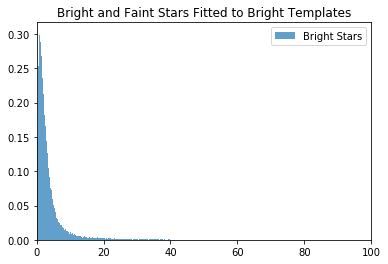

In [27]:
brightChi = np.array(copy.copy(Chi2_br_SNR))
brightChi = brightChi[brightChi<=40]
#chi_vals = chi_vals[chi_vals<20]
#plt.hist(faintChi,1200,normed=True,label='Faint Stars')
plt.hist(brightChi,1200,normed=True,label='Bright Stars',alpha=0.7)
plt.legend()
plt.title('Bright and Faint Stars Fitted to Bright Templates')
plt.xlim([0,100])
plt.show()

In [28]:
# FITTING FAINT STARS TO BRIGHT STAR TEMPLATES USING ACTUAL STAR UNCERTAINTY

mags_br = copy.copy(color_mags_br)
mags_br = mags_br[1:len(mags_br)]

std_br = copy.copy(color_std_err_br)
std_br = std_br[1:len(std_br)]

Chi2_dm_SNR = []

for i in range(len(dm_Gmag)):
    starBand_dm = all_dimStars[i]
    starBand_dm = np.array(starBand_dm)
    starBand_dm = starBand_dm[~np.isnan(starBand_dm)]
    starError_dm = star_err_dm[i]
    starError_dm = starError_dm[~np.isnan(starError_dm)]
    if(len(starBand_dm) == len(all_dimStars[i]) and len(starError_dm) == len(star_err_dm[i])):
        fit_br, newBands, newStar_err, chi2, array1 = StarFitQuad(starBand_dm,mags_br,starError_dm,std_br)
        Chi2_dm_SNR.append(chi2)
        
            
Chi2_dm_SNR = np.array(Chi2_dm_SNR)

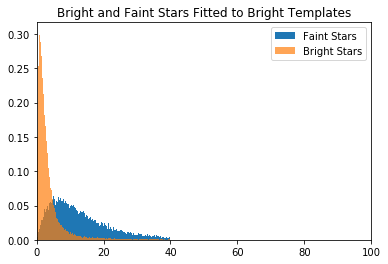

Median Reduced Chi Squared for Bright Stars: 2.19307443541
Median Reduced Chi Squared for Faint Stars: 10.7120433645
0

Faint Star IQR: 17.3781410304

Bright Star IQR: 3.98941703502


In [29]:
faintChi = np.array(copy.copy(Chi2_dm_SNR))
faintChi = faintChi[faintChi<=40]
brightChi = np.array(copy.copy(Chi2_br_SNR))
brightChi = brightChi[brightChi<=40]
#chi_vals = chi_vals[chi_vals<20]
plt.hist(faintChi,1200,normed=True,label='Faint Stars')
plt.hist(brightChi,1200,normed=True,label='Bright Stars',alpha=0.7)
plt.legend()
plt.title('Bright and Faint Stars Fitted to Bright Templates')
plt.xlim([0,100])
plt.show()
print('Median Reduced Chi Squared for Bright Stars:',np.median(brightChi))
print('Median Reduced Chi Squared for Faint Stars:',np.median(faintChi))
print(len(Chi2_dm))

dm75 = np.percentile(faintChi, 75)
br75 = np.percentile(brightChi, 75)
print('\nFaint Star IQR:',dm75)
print('\nBright Star IQR:', br75)

In [30]:
# FITTING BRIGHT and FAINT STARS TO BRIGHT STAR TEMPLATES USING ACTUAL STAR UNCERTAINTY

mags_dm = copy.copy(color_mags_dm)
mags_dm = mags_dm[1:len(mags_dm)]

std_dm = copy.copy(color_std_err_dm)
std_dm = std_dm[1:len(std_dm)]

faintChi2_SNR = []

for i in range(len(dm_Gmag)):
    starBand = all_dimStars[i]
    starBand = np.array(starBand)
    starBand = starBand[~np.isnan(starBand)]
    starError = star_err_dm[i]
    starError = starError[~np.isnan(starError)]
    if(len(starBand) == len(all_dimStars[i]) and len(starError) == len(star_err_dm[i])):
        fit_br, newBands, newStar_err, chi2, array1 = StarFitQuad(starBand,mags_dm,starError,std_dm)
        faintChi2_SNR.append(chi2)
        
faintChi2_SNR = np.array(faintChi2_SNR)

In [31]:
# FITTING BRIGHT and FAINT STARS TO BRIGHT STAR TEMPLATES USING ACTUAL STAR UNCERTAINTY


mags_dm = copy.copy(color_mags_dm)
mags_dm = mags_dm[1:len(mags_dm)]

std_dm = copy.copy(color_std_err_dm)
std_dm = std_dm[1:len(std_dm)]

brightChi2_SNR = []

for i in range(len(br_Gmag)):
    starBand = all_BrightStars[i]
    starBand = np.array(starBand)
    starBand = starBand[~np.isnan(starBand)]
    starError = star_err_br[i]
    starError = starError[~np.isnan(starError)]
    if(len(starBand) == len(all_BrightStars[i]) and len(starError) == len(star_err_br[i])):
        fit_br, newBands, newStar_err, chi2, array1 = StarFitQuad(starBand,mags_dm,starError,std_dm)
        #fit_dm, newBands, newStar_err2, chi2_dm, array2 = StarFitQuad(starBand,mags_dm,starError,std_dm)
        brightChi2_SNR.append(chi2)
        
brightChi2_SNR = np.array(brightChi2_SNR)            


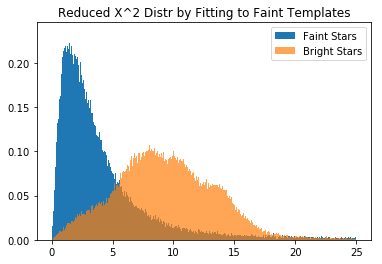

Median Faint Stars val: 3.06689481061
Median Bright Stars val: 9.23628471803

Faint Star IQR: 5.71243408704

Bright Star IQR: 12.3329748959


In [32]:
alpha = np.array(copy.copy(faintChi2_SNR))
beta = np.array(copy.copy(brightChi2_SNR))
alpha = alpha[alpha<=25]
beta = beta[beta<=25]

plt.hist(alpha,1000,normed=True,label='Faint Stars')
plt.hist(beta,1000,normed=True,label='Bright Stars',alpha=0.7)
plt.legend()
#plt.xlim([0,100])
plt.title('Reduced X^2 Distr by Fitting to Faint Templates')
plt.show()
print('Median Faint Stars val:',np.median(faintChi2_SNR))
print('Median Bright Stars val:',np.median(brightChi2_SNR))

dm75 = np.percentile(faintChi2_SNR, 75)
br75 = np.percentile(brightChi2_SNR, 75)
print('\nFaint Star IQR:',dm75)
print('\nBright Star IQR:', br75)

# GIANT BRANCH VS MAIN-SEQUENCE BRANCH

In [33]:
Gmags = Gmag - 5 * np.log10(Dist) + 5
GK = Gmag - Kmag
giantGmag = []
giantGflux = []
giantGflux_er = []
giantGBmag = []
giantGBflux = []
giantGBflux_er = []
giantGRmag = []
giantGRflux = []
giantGRflux_er = []
giantJmag = []
giantHmag = []
giantKmag = []
giantGK = []
giantG = []
J_unc_giant = []
H_unc_giant = []
K_unc_giant = []

for i in range(len(Gmags)):
    if(Gmags[i] < 0.85 and GK[i] >= 1.3 and GK[i] <= 3.2):
        giantGmag.append(Gmag[i])
        giantGBmag.append(GBmag[i])
        giantGRmag.append(GRmag[i])
        giantJmag.append(Jmag[i])
        giantHmag.append(Hmag[i])
        giantKmag.append(Kmag[i])
        giantGK.append(GK[i])
        giantG.append(Gmags[i])
        giantGflux.append(G_flux[i])
        giantGflux_er.append(G_flux_er[i])
        giantGBflux.append(GB_flux[i])
        giantGBflux_er.append(GB_flux_er[i])
        giantGRflux.append(GR_flux[i])
        giantGRflux_er.append(GR_flux_er[i])
        J_unc_giant.append(J_unc[i])
        H_unc_giant.append(H_unc[i])
        K_unc_giant.append(K_unc[i])
    
giantGmag = np.array(giantGmag)
giantGBmag = np.array(giantGBmag)
giantGRmag = np.array(giantGRmag)
giantJmag = np.array(giantJmag)
giantHmag = np.array(giantHmag)
giantKmag = np.array(giantKmag)
giantGflux = np.array(giantGflux)
giantGflux_er = np.array(giantGflux_er)
giantGBflux = np.array(giantGBflux)
giantGBflux_er = np.array(giantGBflux_er)
giantGRflux = np.array(giantGRflux)
giantGRflux_er = np.array(giantGRflux_er)
giantGK = np.array(giantGK)
giantG = np.array(giantG)
all_giantStars = np.transpose([giantGmag,giantGBmag,giantGRmag,giantJmag,giantHmag,giantKmag])
print('Length of Br_Mags:',len(giantGmag))

MS_G = []
MS_Gmag = []
MS_GBmag = []
MS_GRmag = []
MS_Jmag = []
MS_Hmag = []
MS_Kmag = []
MS_GK = []
MS_Gflux = []
MS_Gflux_er = []
MS_GBflux = []
MS_GBflux_er = []
MS_GRflux = []
MS_GRflux_er = []
J_unc_MS = []
H_unc_MS = []
K_unc_MS = []

for i in range(len(Gmags)):
    if(Gmags[i] > 5.5 and Gmags[i] < 6 and GK[i] >= 1.7 and GK[i] <= 3.2):
        MS_Gmag.append(Gmag[i])
        MS_GBmag.append(GBmag[i])
        MS_GRmag.append(GRmag[i])
        MS_Jmag.append(Jmag[i])
        MS_Hmag.append(Hmag[i])
        MS_Kmag.append(Kmag[i])
        MS_GK.append(GK[i])
        MS_G.append(Gmags[i])
        MS_Gflux.append(G_flux[i])
        MS_Gflux_er.append(G_flux_er[i])
        MS_GBflux.append(GB_flux[i])
        MS_GBflux_er.append(GB_flux_er[i])
        MS_GRflux.append(GR_flux[i])
        MS_GRflux_er.append(GR_flux_er[i])
        J_unc_MS.append(J_unc[i])
        H_unc_MS.append(H_unc[i])
        K_unc_MS.append(K_unc[i])

MS_Gflux = np.array(MS_Gflux)
MS_Gflux_er = np.array(MS_Gflux_er)
MS_GBflux = np.array(MS_GBflux)
MS_GBflux_er = np.array(MS_GBflux_er)
MS_GRflux = np.array(MS_GRflux)
MS_GRflux_er = np.array(MS_GRflux_er)
MS_Gmag = np.array(MS_Gmag)
MS_GBmag = np.array(MS_GBmag)
MS_GRmag = np.array(MS_GRmag)
MS_Jmag = np.array(MS_Jmag)
MS_Hmag = np.array(MS_Hmag)
MS_Kmag = np.array(MS_Kmag)
MS_GK = np.array(MS_GK)
MS_G = np.array(MS_G)
all_mainStars = np.transpose([MS_Gmag,MS_GBmag,MS_GRmag,MS_Jmag,MS_Hmag,MS_Kmag])
print('Length of dm_Mags:',len(MS_Gmag))

Length of Br_Mags: 1590
Length of dm_Mags: 14540


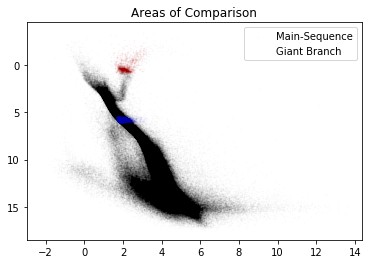

Giant Stars: 1590
Main-Sequence Stars: 14540


In [34]:
GK = Gmag - Kmag
plt.scatter(GK,Gmags,s=1.0,alpha=0.01,c='k')
plt.scatter(MS_GK,MS_G,s=1.2,alpha=0.01,c='blue',label='Main-Sequence')
plt.scatter(giantGK,giantG,s=1.2,alpha=0.01,c='red',label='Giant Branch')
plt.legend()
plt.title('Areas of Comparison')
plt.gca().invert_yaxis()
plt.show()
print('Giant Stars:',len(giantGK))
print('Main-Sequence Stars:',len(MS_GK))

In [35]:
# UNCERTAINTY IN G BAND FOR MAIN-SEQUENCE
MSerror_G = []

for i in range(0,len(MS_Gmag)):
    
    flux = MS_Gflux[i]
    flux_er = MS_Gflux_er[i]
    Mag_er = MagError(flux,flux_er,0.001)
    MSerror_G.append(Mag_er)

MSerror_G = np.array(MSerror_G)

# UNCERTAINTY IN GR BAND FOR MAIN-SEQUENCE
MSerror_GR = []

for i in range(0,len(MS_Gmag)):
    
    flux = MS_GRflux[i]
    flux_er = MS_GRflux_er[i]
    Mag_er = MagError(flux,flux_er,10**-2.5)
    MSerror_GR.append(Mag_er)

MSerror_GR = np.array(MSerror_GR)

# UNCERTAINTY IN GB BAND FOR MAIN-SEQUENCE
MSerror_GB = []

for i in range(0,len(MS_Gmag)):
    
    flux = MS_GBflux[i]
    flux_er = MS_GBflux_er[i]
    Mag_er = MagError(flux,flux_er,10**-2.5)
    MSerror_GB.append(Mag_er)

MSerror_GB = np.array(MSerror_GB)


In [36]:
# UNCERTAINTY IN G BAND FOR GIANTS
giantError_G = []

for i in range(0,len(giantGmag)):
    
    flux = MS_Gflux[i]
    flux_er = MS_Gflux_er[i]
    Mag_er = MagError(flux,flux_er,0.001)
    giantError_G.append(Mag_er)

giantError_G = np.array(giantError_G)

# UNCERTAINTY IN GR BAND FOR GIANTS
giantError_GR = []

for i in range(0,len(giantGmag)):
    
    flux = MS_GRflux[i]
    flux_er = MS_GRflux_er[i]
    Mag_er = MagError(flux,flux_er,10**-2.5)
    giantError_GR.append(Mag_er)

giantError_GR = np.array(giantError_GR)

# UNCERTAINTY IN GB BAND FOR GIANTS
giantError_GB = []

for i in range(0,len(giantGmag)):
    
    flux = MS_GBflux[i]
    flux_er = MS_GBflux_er[i]
    Mag_er = MagError(flux,flux_er,10**-2.5)
    giantError_GB.append(Mag_er)

giantError_GB = np.array(giantError_GB)


In [37]:
MS_StarError = np.transpose([MSerror_G,MSerror_GR,MSerror_GB,J_unc_MS,H_unc_MS,K_unc_MS])
Giant_StarError = np.transpose([giantError_G,giantError_GR,giantError_GB,J_unc_giant,H_unc_giant,K_unc_giant])

In [38]:
# BUILDING GIANT AND MAIN-SEQUENCE TEMPLATES

colors = np.arange(1.7,3.0,0.03) # EDIT THIS TO USE DESIRED NUMBER OF COLORS/TEMPLATES

# BRIGHT STARS
color_MS = ColorClassification(MS_Gmag,MS_Kmag,colors)

stars_MS,color_mags_MS,color_std_MS,color_std_err_MS,abs_color_mags_MS,abs_color_std_MS,abs_color_std_err_MS = \
CreateTemplates(color_MS,colors,Gmags=MS_Gmag,Kmags=MS_Kmag,GB_mags=MS_GBmag,GR_mags=MS_GRmag,J_mags=MS_Jmag,H_mags=MS_Hmag)

# DIM STARS
color_Giant = ColorClassification(giantGmag,giantKmag,colors)

GiantStars,color_mags_Giant,color_std_Giant,color_std_err_Giant,abs_color_mags_Giant,abs_color_std_Giant,abs_color_std_err_Giant = \
CreateTemplates(color_Giant,colors,giantGmag,giantKmag,GB_mags=giantGBmag,GR_mags=giantGRmag,J_mags=giantJmag,H_mags=giantHmag)

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: RuntimeWarning: Mean of empty slice
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:111: RuntimeWarning: Mean of empty slice


In [39]:
# FITTING MAIN-SEQUENCE STARS TO MAIN-SEQUENCE STAR TEMPLATES USING ACTUAL STAR UNCERTAINTY

mags_MS = copy.copy(color_mags_MS)
mags_MS = mags_MS[1:len(mags_MS)]

std_MS = copy.copy(color_std_err_MS)
std_MS = std_MS[1:len(std_MS)]

Chi2_MS = []

for i in range(len(MS_Gmag)):
    starBand = all_mainStars[i]
    starBand = np.array(starBand)
    starBand = starBand[~np.isnan(starBand)]
    starError = MS_StarError[i]
    starError = starError[~np.isnan(starError)]
    if(len(starBand) == len(all_mainStars[i]) and len(starError) == len(MS_StarError[i])):
        fit_MS, newBands, newStar_err, chi2, array1 = StarFitQuad(starBand,mags_MS,starError,std_MS)
        #fit_dm, newBands, newStar_err2, chi2_dm, array2 = StarFitQuad(starBand,mags_dm,starError,std_dm)
        Chi2_MS.append(chi2)
        
Chi2_MS = np.array(Chi2_MS) 

In [40]:
# FITTING GIANT STARS TO MAIN-SEQUENCE STAR TEMPLATES USING ACTUAL STAR UNCERTAINTY

mags_MS = copy.copy(color_mags_MS)
mags_MS = mags_MS[1:len(mags_MS)]

std_MS = copy.copy(color_std_err_MS)
std_MS = std_MS[1:len(std_MS)]

Chi2_giant = []
#Chi2_giant = []
for i in range(len(giantGmag)):
    starBand = all_giantStars[i]
    starBand = np.array(starBand)
    starBand = starBand[~np.isnan(starBand)]
    starError = Giant_StarError[i]
    starError = starError[~np.isnan(starError)]
    if(len(starBand) == len(all_giantStars[i]) and len(starError) == len(Giant_StarError[i])):
        fit_giant, newBands, newStar_err, chi2, array1 = StarFitQuad(starBand,mags_MS,starError,std_MS)
        Chi2_giant.append(chi2)
        
Chi2_giant = np.array(Chi2_giant)

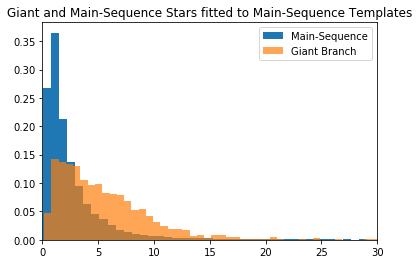

Mean MS: 3.77758437658
Median MS: 1.62484029167

Mean Giant: 5.88466572842
Median Giant 4.50059842695

Main-Sequence IQR: 2.40368935547

Giant IQR: 5.06284476072


In [41]:
plt.hist(Chi2_MS,500,normed=True,label='Main-Sequence')
plt.hist(Chi2_giant,500,normed=True,alpha=0.7,label='Giant Branch')
plt.title('Giant and Main-Sequence Stars fitted to Main-Sequence Templates')
plt.legend()
plt.xlim([0,30])
plt.show()
print('Mean MS:',np.mean(Chi2_MS))
print('Median MS:',np.median(Chi2_MS))
print('\nMean Giant:',np.mean(Chi2_giant))
print('Median Giant',np.median(Chi2_giant))
MS_75, MS_25 = np.percentile(Chi2_MS, [75 ,25])
iqr_MS = MS_75 - MS_25
print('\nMain-Sequence IQR:',iqr_MS)
giant_75, giant_25 = np.percentile(Chi2_giant, [75 ,25])
iqr_giant = giant_75 - giant_25
print('\nGiant IQR:',iqr_giant)



In [42]:
# FITTING GIANT STARS TO GIANT STAR TEMPLATES USING ACTUAL STAR UNCERTAINTY

mags_giant = copy.copy(color_mags_Giant)
mags_giant = mags_giant[1:len(mags_giant)]

std_giant = copy.copy(color_std_err_Giant)
std_giant = std_giant[1:len(std_giant)]

fewChi2_giant = []

for i in range(len(giantGmag)):
    starBand = all_giantStars[i]
    starBand = np.array(starBand)
    starBand = starBand[~np.isnan(starBand)]
    starError = Giant_StarError[i]
    starError = starError[~np.isnan(starError)]
    if(len(starBand) == len(all_giantStars[i]) and len(starError) == len(Giant_StarError[i])):
        fit_giant, newBands, newStar_err, chi2, array1 = StarFitQuad(starBand,mags_giant,starError,std_giant)
        fewChi2_giant.append(chi2)
        
fewChi2_giant = np.array(fewChi2_giant)

In [43]:
# FITTING MAIN-SEQUENCE STARS TO GIANT STAR TEMPLATES USING ACTUAL STAR UNCERTAINTY

mags_giant = copy.copy(color_mags_Giant)
mags_giant = mags_giant[1:len(mags_giant)]

std_giant = copy.copy(color_std_err_Giant)
std_giant = std_giant[1:len(std_giant)]

fewChi2_MS = []
for i in range(len(MS_Gmag)):
    starBand = all_mainStars[i]
    starBand = np.array(starBand)
    starBand = starBand[~np.isnan(starBand)]
    starError = MS_StarError[i]
    starError = starError[~np.isnan(starError)]
    if(len(starBand) == len(all_mainStars[i]) and len(starError) == len(MS_StarError[i])):
        fit_giant, newBands, newStar_err, chi2, array1 = StarFitQuad(starBand,mags_giant,starError,std_giant)
        fewChi2_MS.append(chi2)
        
fewChi2_MS = np.array(fewChi2_MS)

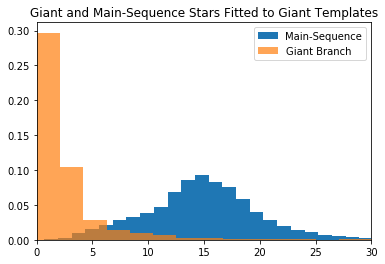

Mean MS: 15.9550957541
Median MS: 14.9758936576

Mean Giant: 4.00564119805
Median Giant 1.53940049752

Main-Sequence IQR: 6.17080106888

Giant IQR: 2.41901981525


In [44]:
plt.hist(fewChi2_MS,500,normed=True,label='Main-Sequence')
plt.hist(fewChi2_giant,500,normed=True,alpha=0.7,label='Giant Branch')
plt.legend()
plt.title('Giant and Main-Sequence Stars Fitted to Giant Templates')
plt.xlim([0,30])
plt.show()
print('Mean MS:',np.mean(fewChi2_MS))
print('Median MS:',np.median(fewChi2_MS))
print('\nMean Giant:',np.mean(fewChi2_giant))
print('Median Giant',np.median(fewChi2_giant))
MS_75, MS_25 = np.percentile(fewChi2_MS, [75 ,25])
iqr_MS = MS_75 - MS_25
print('\nMain-Sequence IQR:',iqr_MS)
giant_75, giant_25 = np.percentile(fewChi2_giant, [75 ,25])
iqr_giant = giant_75 - giant_25
print('\nGiant IQR:',iqr_giant)